## Unveiling Barcelona’s Rental Market: From Districts to Seasons, What the ‘Rent Price in Barcelona 2014–2022’ Dataset Reveals

# Business Understanding

The dataset named 'Rent price in Barcelona 2014 - 2022' from Kaggle includes data on price for rent in Barcelona, Spain.

The dataset was filtered to answer these 3 questions I was interested in:

    1. What Are the Most Expensive and Affordable Neighborhoods for Renting in Barcelona by Year?
    2. How Have Rental Prices Evolved Over the Years in Different Districts of Barcelona?
    3. Are There Seasonal Patterns in Barcelona's Rental Prices Across Trimesters?



In [353]:
# Import the pandas library for data manipulation and analysis
import pandas as pd

# Import the matplotlib.pyplot module for creating visualizations
import matplotlib.pyplot as plt

# Data Preparation

In [354]:
# Load the Barcelona rent price dataset from a CSV file into a pandas DataFrame
bcn_rents = pd.read_csv('Barcelona_rent_price.csv')

In [355]:
# Interested only in average rent (euro/month)
bcn_rents_euro = bcn_rents[bcn_rents['Average _rent']=='average rent (euro/month)']

In [356]:
# Group by 'Year' and 'Neighbourhood' and calculate the mean of 'Price'
neigh_rents = bcn_rents_euro.groupby(['Year', 'Neighbourhood'])['Price'].mean()
neigh_rents = pd.DataFrame(neigh_rents)
neigh_rents = neigh_rents.reset_index()

# 1. What Are the Most Expensive and Affordable Neighborhoods for Renting in Barcelona by Year?

In [365]:
# Define a function to filter rent data for a specific year
def rents_year(year):
     """
    Description: This function filters rent data for a specific year.

    Arguments:
        year (int): The year for which to filter the data.

    Returns:
        pandas.DataFrame: A DataFrame containing rental data for the specified year, sorted by price in descending order.
    """
     return neigh_rents[neigh_rents['Year'] == year].sort_values(by='Price', ascending=False)

# Define a function to find the most and least expensive neighborhoods for a specific year
def rents_most_less(year):
    """
    Description: This function finds the most and least expensive neighborhoods for a specific year.

    Arguments:
        year (int): The year for which to find the neighborhoods.

    Returns:
        prices (dict): A dictionary containing the most and least expensive neighborhoods for the specified year along with their respective prices.
    """
    nr_year = rents_year(year)
    most_expensive = nr_year.iloc[0]['Neighbourhood']
    least_expensive = nr_year.iloc[-1]['Neighbourhood']
    prices = {
        most_expensive: round(nr_year.iloc[0]['Price'], 2),
        least_expensive: round(nr_year.iloc[-1]['Price'], 2)
    }
    return prices


# Create a list of years for analysis
years = list(range(2014, 2023))

# Initialize a list to store results
nr = []

# Iterate through years and store most and least expensive neighborhoods
for year in years:
    nr.append(list(rents_most_less(year).items()))

# Print the list of most and least expensive neighborhoods for each year
print(nr)


[[('Pedralbes', 1489.34), ('Can Peguera', 227.61)], [('Pedralbes', 1714.14), ('Baro de Viver', 284.58)], [('Pedralbes', 1653.7), ('Baro de Viver', 199.4)], [('Pedralbes', 1785.88), ('Vallbona', 302.52)], [('Pedralbes', 1707.01), ('Torre Baro', 434.52)], [('Pedralbes', 1863.18), ('la Marina del Prat Vermell', 350.5)], [('Pedralbes', 1739.75), ('Torre Baro', 452.0)], [('Pedralbes', 1693.58), ('Ciutat Meridiana', 525.7)], [('Pedralbes', 1797.15), ('Ciutat Meridiana', 547.5)]]


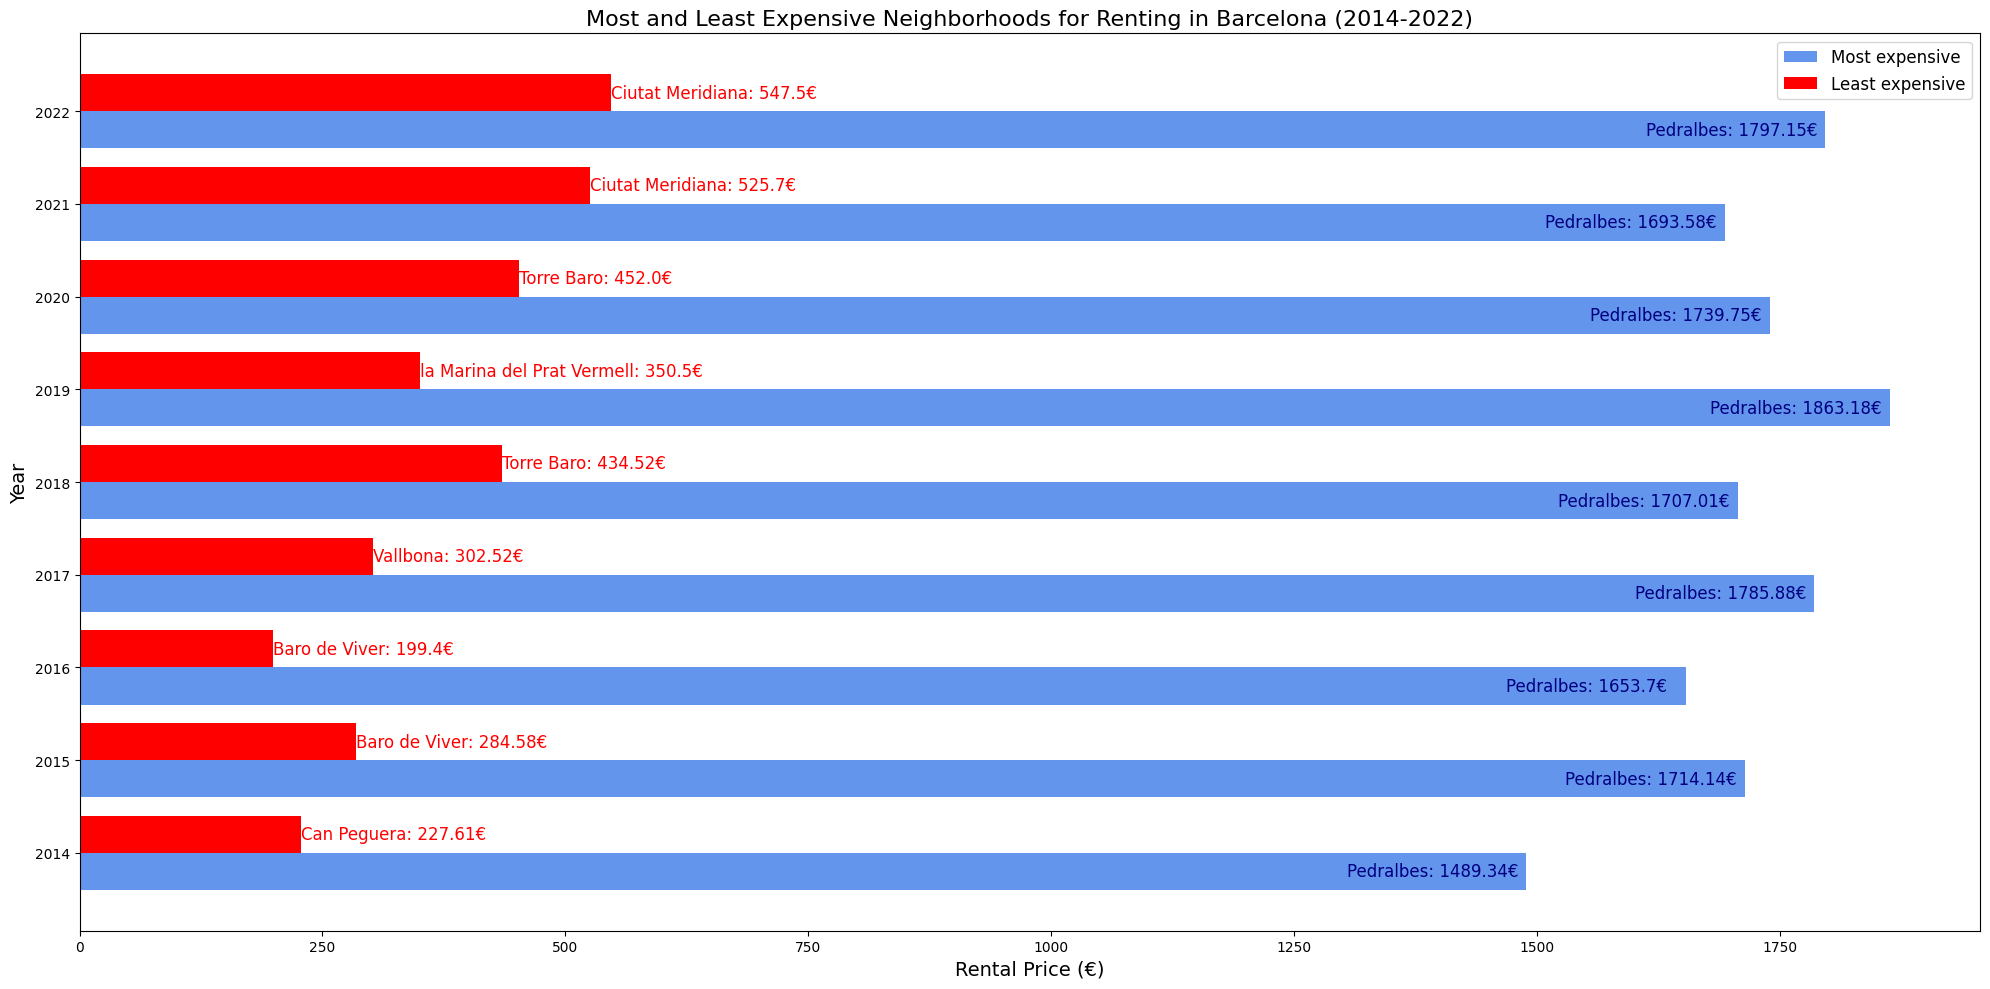

In [348]:
# Extract years and neighborhoods data from the calculated result 'nr'
x_values = years  # Years for the x-axis
bar1_values = []  # List to store prices for the most expensive neighborhoods
bar2_values = []  # List to store prices for the least expensive neighborhoods
bar1_text = []    # List to store labels for the most expensive neighborhoods
bar2_text = []    # List to store labels for the least expensive neighborhoods

# Populate the lists for bar values and labels
for i in range(len(nr)):
    bar1_values.append(nr[i][0][1])  # Prices of the most expensive neighborhoods
    bar2_values.append(nr[i][1][1])  # Prices of the least expensive neighborhoods
    bar1_text.append(nr[i][0])       # Labels for the most expensive neighborhoods
    bar2_text.append(nr[i][1])       # Labels for the least expensive neighborhoods

# Create the figure and axes for the grouped bar plot
fig, ax = plt.subplots(figsize=(20, 10))

# Set the width of the bars
bar_height = 0.4

# Calculate positions for the bars
bar1_positions = range(len(x_values))
bar2_positions = [pos + bar_height for pos in bar1_positions]

# Create the grouped bar plot for most and least expensive neighborhoods
ax.barh(bar1_positions, bar1_values, height=bar_height, label='Most expensive', color='cornflowerblue')
ax.barh(bar2_positions, bar2_values, height=bar_height, label='Least expensive', color='red')

# Add text labels for Bar 1 (most expensive neighborhoods)
for i, (label, value) in enumerate(bar1_text):
    ax.text(bar1_values[i] - 185, i, f'{label}: {value}€', ha='left', va='center', color='navy', fontsize=12)

# Add text labels for Bar 2 (least expensive neighborhoods)
for i, (label, value) in enumerate(bar2_text):
    ax.text(bar2_values[i], i + bar_height, f'{label}: {value}€', ha='left', va='center', color='r', fontsize=12)


# Set the y-axis ticks and labels to show years
ax.set_yticks([pos + bar_height / 2 for pos in bar1_positions])
ax.set_yticklabels(x_values)

# Set labels and title for the plot
ax.set_xlabel('Rental Price (€)', fontsize=14)  # Added unit
ax.set_ylabel('Year', fontsize=14)
ax.set_title('Most and Least Expensive Neighborhoods for Renting in Barcelona (2014-2022)', fontsize=16)
ax.legend(fontsize=12)  # Show the legend

plt.tight_layout()  # Adjust layout
plt.show()  # Display the plot


# 2. How Have Rental Prices Evolved Over the Years in Different Districts of Barcelona?

['Ciutat Vella' 'Eixample' 'Sants-Montjuic' 'Les Corts'
 'Sarria-Sant Gervasi' 'Gracia' 'Horta-Guinardo' 'Nou Barris'
 'Sant Andreu' 'Sant Marti']


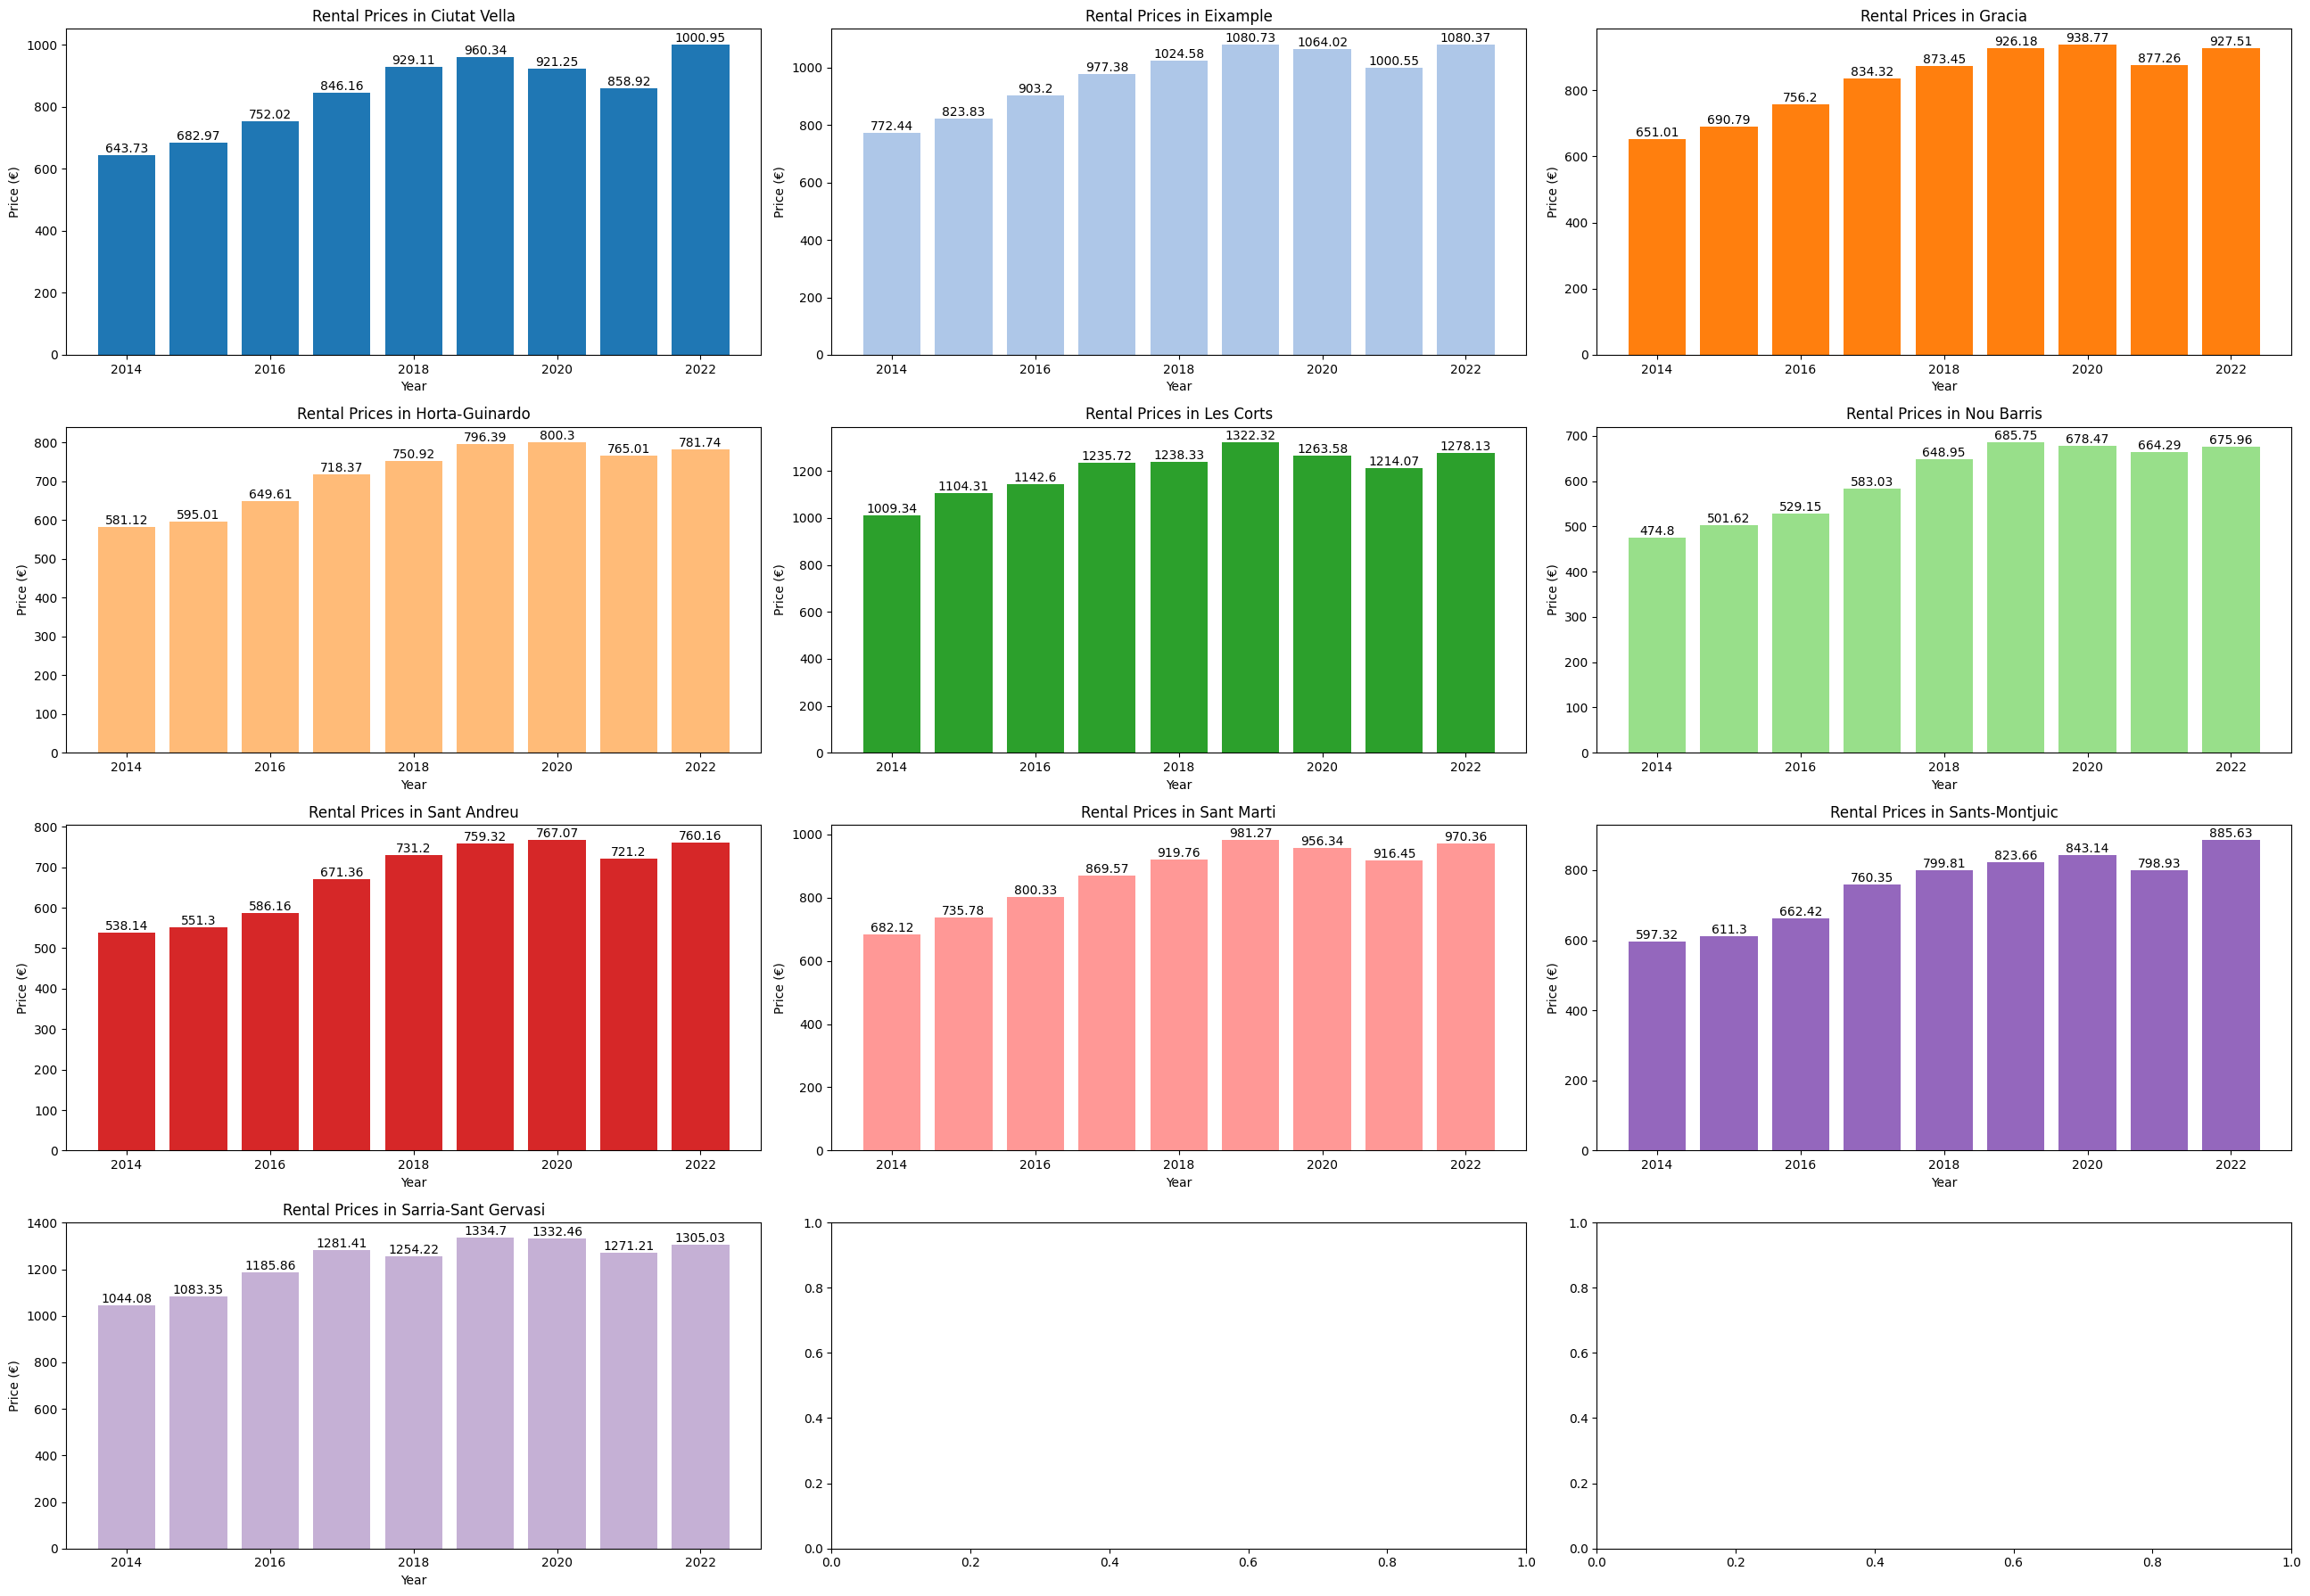

In [349]:
# Group by District and Year
print(bcn_rents_euro['District'].unique())  # Display unique district names to check data

# Group the data by Year and District and calculate the mean price
distr_rents = bcn_rents_euro.groupby(['Year', 'District'])['Price'].mean()
distr_rents = pd.DataFrame(distr_rents)  # Convert the grouped data to a DataFrame
distr_rents = distr_rents.reset_index()   # Reset the index for the DataFrame

# Extract prices for different districts
# Initialize variables to store prices for each district
# Extract prices for each district from the grouped data
ciutat_vella_prices = distr_rents[distr_rents['District']=='Ciutat Vella']['Price']
eixample_prices = distr_rents[distr_rents['District']=='Eixample']['Price']
gracia_prices = distr_rents[distr_rents['District']=='Gracia']['Price']
horta_guinardo_prices = distr_rents[distr_rents['District']=='Horta-Guinardo']['Price']
les_corts_prices = distr_rents[distr_rents['District']=='Les Corts']['Price']
nou_barris_prices = distr_rents[distr_rents['District']=='Nou Barris']['Price']
sant_andreu_prices = distr_rents[distr_rents['District']=='Sant Andreu']['Price']
sant_marti_prices = distr_rents[distr_rents['District']=='Sant Marti']['Price']
sants_montjuic_prices = distr_rents[distr_rents['District']=='Sants-Montjuic']['Price']
sarria_santgervasi_prices = distr_rents[distr_rents['District']=='Sarria-Sant Gervasi']['Price']

# Create a 3x3 grid of subplots for visualizing district-wise rental price trends
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(26, 18))


# Define district names and corresponding data
districts = ['Ciutat Vella', 'Eixample', 'Gracia', 'Horta-Guinardo', 'Les Corts', 'Nou Barris', 'Sant Andreu', 'Sant Marti', 'Sants-Montjuic', 'Sarria-Sant Gervasi']  
district_data = [ciutat_vella_prices, eixample_prices, gracia_prices, horta_guinardo_prices, les_corts_prices, nou_barris_prices,
                 sant_andreu_prices, sant_marti_prices, sants_montjuic_prices, sarria_santgervasi_prices]  


# Use tab20 color palette for distinct colors
tab20_colors = plt.cm.tab20.colors

# Plot rental price bars for each district in a subplot
for i in range(len(districts)):
    row = i // 3
    col = i % 3
    ax = axes[row, col]
    
    bars = ax.bar(years, district_data[i], color=tab20_colors[i]) # Create the bar plot
    ax.set_xlabel('Year')
    ax.set_ylabel('Price (€)')
    ax.set_title(f'Rental Prices in {districts[i]}')
    
    # Add prices above each bar
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, height, str(round(height, 2)),
                ha='center', va='bottom')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

# 3. Are There Seasonal Patterns in Barcelona's Rental Prices Across Trimesters?

# Data Modeling

In [366]:
# Projecting Barcelona's Rental Prices for Q3 and Q4 of 2022

# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Data Preprocessing: No missing values or categorical variables to handle

# Group by District and Trimester to calculate average rental prices
distr_trim = bcn_rents_euro.groupby(['Trimester', 'Year'])['Price'].mean()
distr_trim = pd.DataFrame(distr_trim)
distr_trim = distr_trim.reset_index()

# Create a list to store the average rental prices for each quarter and year
bcn_trims = []
years = list(range(2014, 2022))

# Populate the list with average prices for each quarter and year
for i in range(len(years)):
    bcn_trims.append(distr_trim[distr_trim['Year'] == years[i]]['Price'])

# Prepare data for linear regression
X = np.array(list(range(2014, 2022))).reshape(-1, 1)
y = []  # This will store training data for each quarter
pQ = []  # This will store predicted prices for each quarter in 2022

# Create y for each quarter and year
for t in range(4):
    quarter_data = []  # This list will hold the data for the current quarter
    
    for i in range(len(X)):
        quarter_data.append(bcn_trims[i].tolist()[t])
    
    y.append(quarter_data)

# Train the model and make predictions for each quarter
for t in range(4):
    model = LinearRegression()
    model.fit(X, y[t])

    # Make predictions for 2022
    price_Q_2022 = model.predict(np.array([[2022]]).reshape(-1, 1))
    pQ.append(price_Q_2022)

    print("Predicted Price for 2022 (Quarter", t + 1,"):", price_Q_2022[0])

# Manually set predicted prices for Q3 and Q4 of 2022
pQ[0] = 899.0253731343
pQ[1] = 945.7220588235
pQ[2] = 996.49616672
pQ[3] = 977.86640612


Predicted Price for 2022 (Quarter 1 ): 978.4892569150688
Predicted Price for 2022 (Quarter 2 ): 979.6186180361401
Predicted Price for 2022 (Quarter 3 ): 996.4961667184834
Predicted Price for 2022 (Quarter 4 ): 977.8664061179297


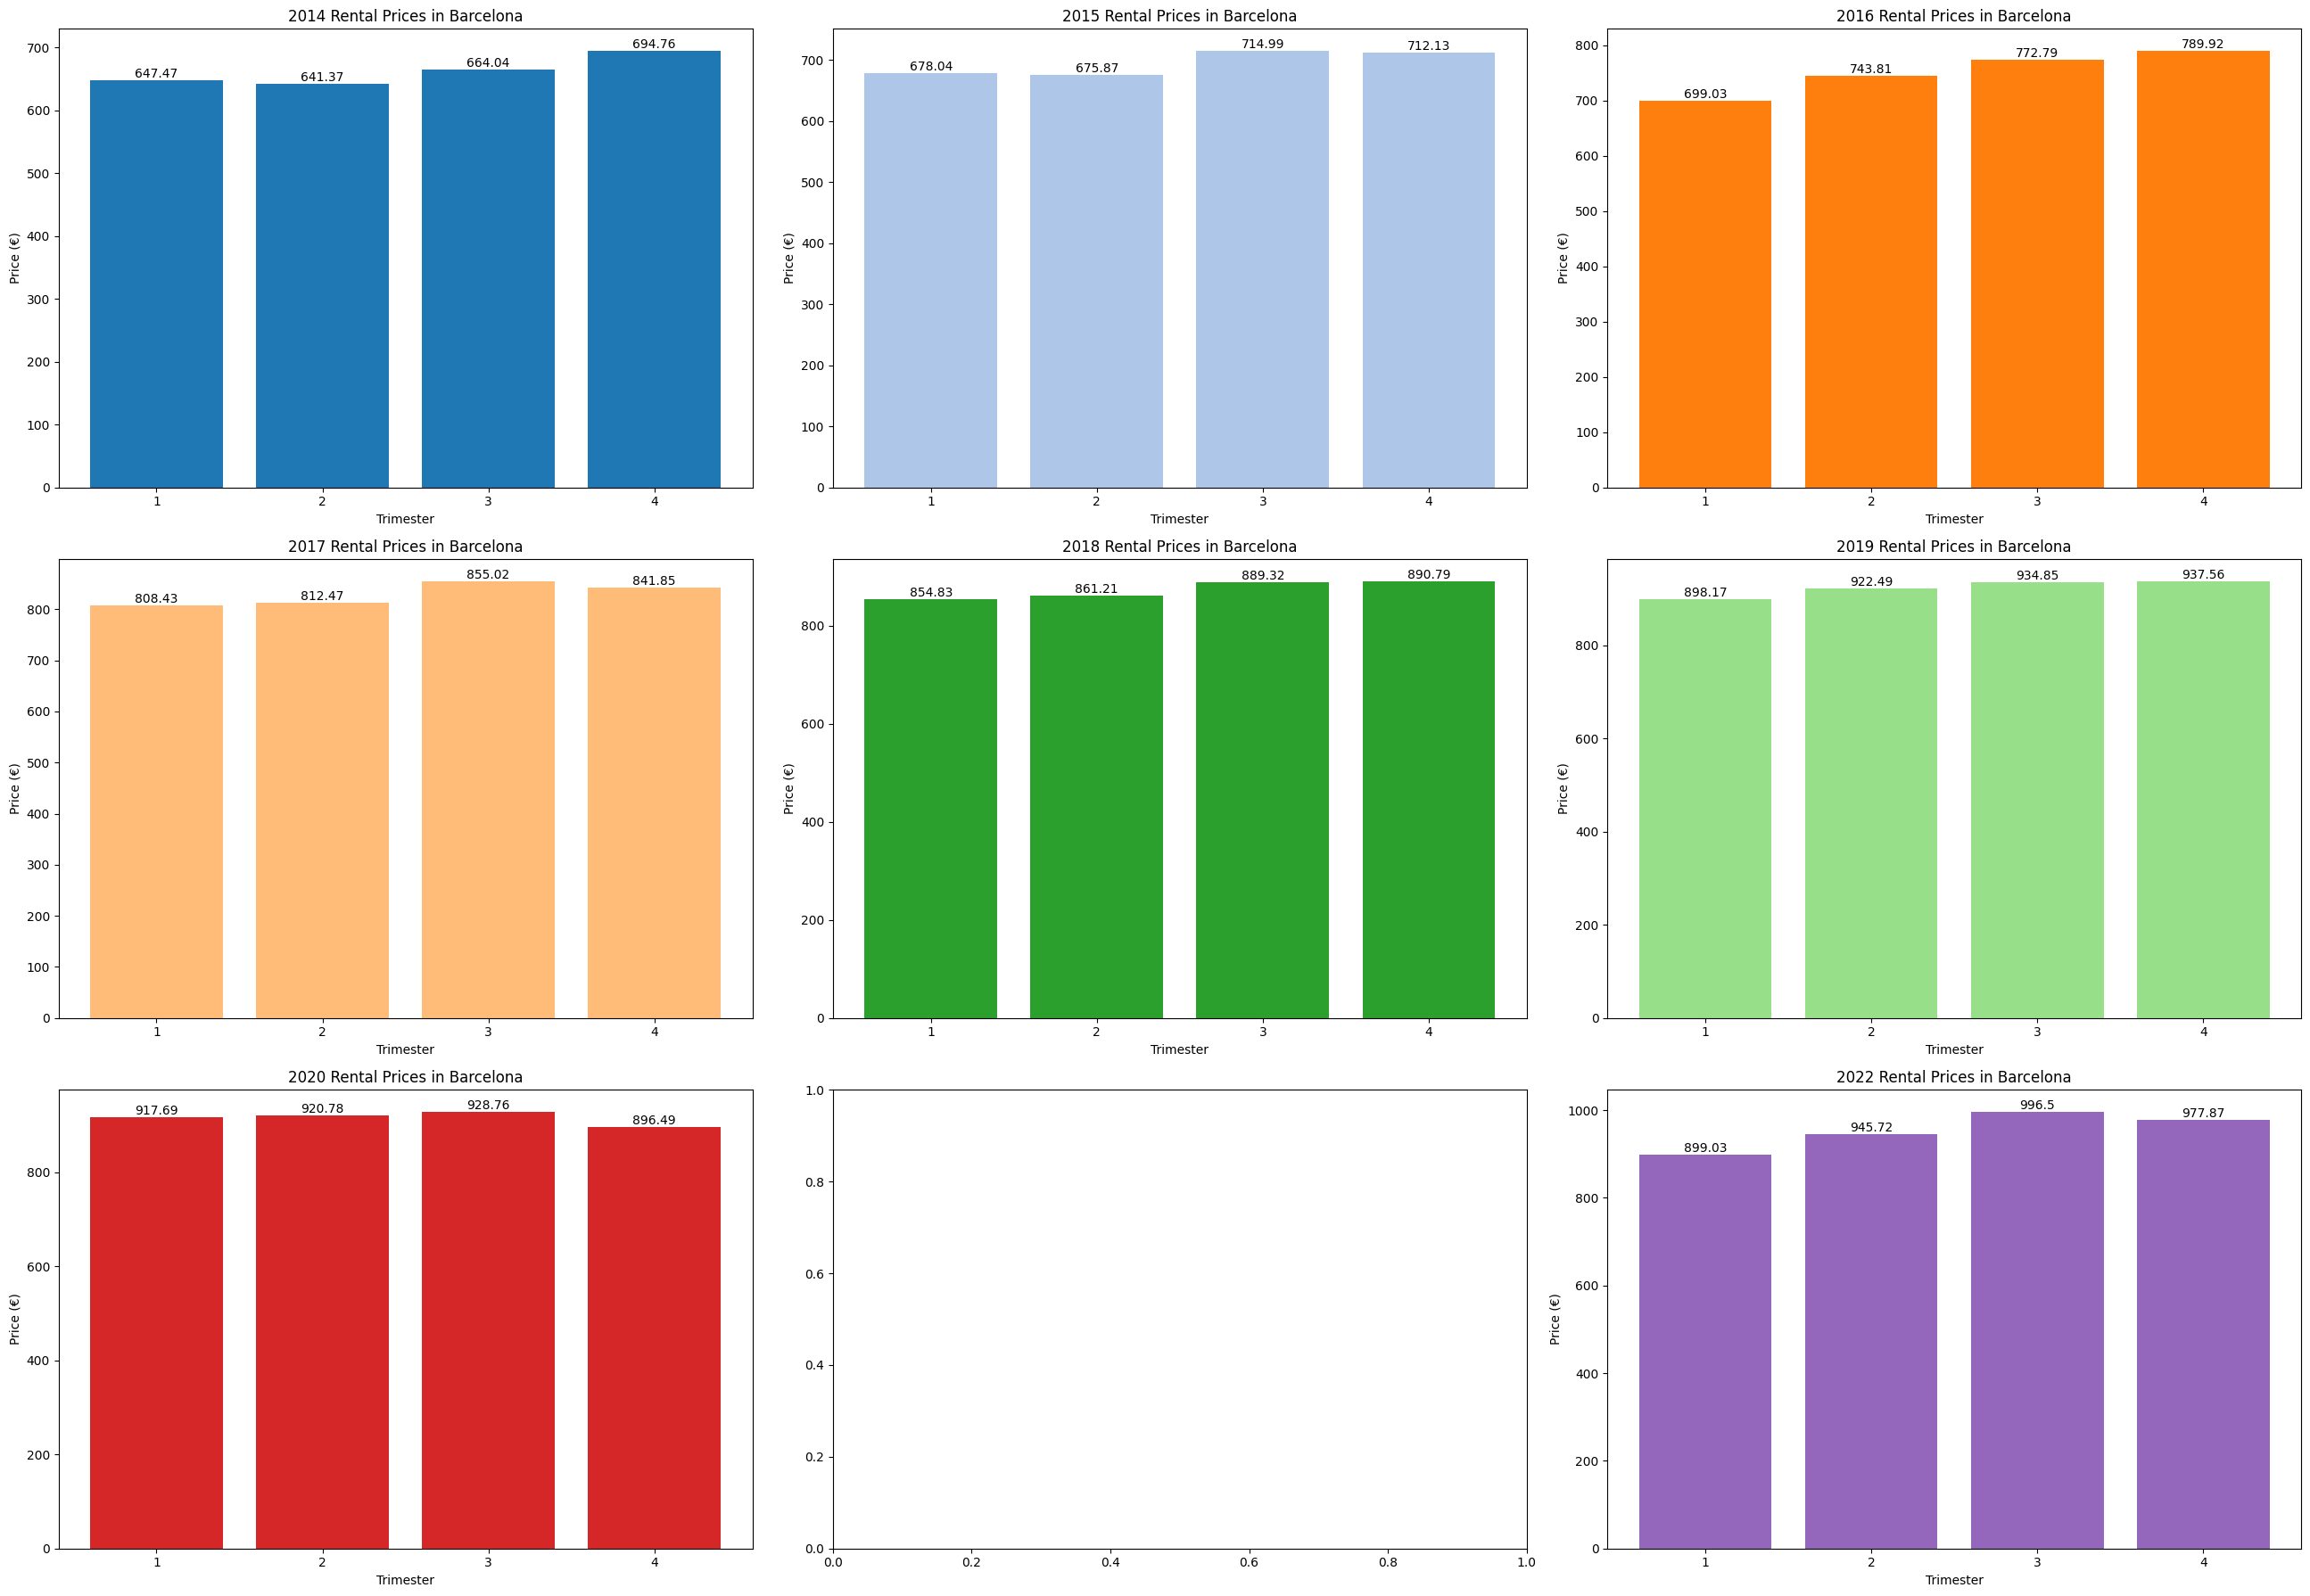

In [352]:
# Create a 3x3 grid of subplots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(26, 18))

# Define district names and corresponding data
trimesters = [1,2,3,4]
bcn_data = bcn_trims

# Use tab20 color palette for distinct colors
tab20_colors = plt.cm.tab20.colors

# Plot bars in each subplot
for i in range(len(years)-1):
    row = i // 3
    col = i % 3
    ax = axes[row, col]
    
    bars = ax.bar(trimesters, bcn_trims[i].tolist(), color=tab20_colors[i])
    ax.set_xlabel('Trimester')
    ax.set_ylabel('Price (€)')
    ax.set_title(f'{years[i]} Rental Prices in Barcelona')

    # Set custom x-tick labels
    custom_xtick_labels = [1, 2, 3, 4]
    ax.set_xticks(custom_xtick_labels)
    ax.set_xticklabels(custom_xtick_labels)
    
    # Add prices above each bar
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, height, str(round(height, 2)),
                ha='center', va='bottom')

# Access the subplot at position (3, 3) [2022]
bbar = axes[2, 2].bar(trimesters, pQ, color=tab20_colors[len(years)])
axes[2, 2].set_xlabel('Trimester')
axes[2, 2].set_ylabel('Price (€)')
axes[2, 2].set_title('2022 Rental Prices in Barcelona')

# Set custom x-tick labels
axes[2, 2].set_xticks(custom_xtick_labels)
axes[2, 2].set_xticklabels(custom_xtick_labels)

for bar in bbar:
    height = bar.get_height()
    x = bar.get_x() + bar.get_width() / 2  # Get the x-coordinate of the bar's center
    y = height  # The height is used as the y-coordinate for labeling
    axes[2, 2].text(x, y, str(round(height, 2)),
                    ha='center', va='bottom')


# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


# Results evaluation

The main findings of the code can be found in the related Medium post: [Unveiling Barcelona's Rental Market](https://medium.com/@jaume.bogunaurue/unveiling-barcelonas-rental-market-from-districts-to-seasons-what-the-rent-price-in-barcelona-9ded0e4a2e5)